# Sinkers vs Two Seamers

Are the classification systems the same?

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pandas as pd

import glob

In [37]:

# THIS WORKS!




class SOEllipse(object):
    '''
    #
    # Conic Ellipse fitter
    #     exploiting the quadratic curve nature of the ellipse
    #

    advantages: fast

    disadvantages: does not have flexibility
    
    '''
    @staticmethod
    def fitEllipse(x,y):
        #
        # Take a set of x,y points at fit an ellipse to it
        #
        x = x[:,np.newaxis]
        y = y[:,np.newaxis]
        D =  np.hstack((x*x, x*y, y*y, x, y, np.ones_like(x)))
        S = np.dot(D.T,D)
        C = np.zeros([6,6])
        C[0,2] = C[2,0] = 2; C[1,1] = -1
        E, V =  eig(np.dot(inv(S), C))
        n = np.argmax(np.abs(E))
        a = V[:,n]
        
        return a
    @staticmethod
    def ellipse_center(a):
        b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
        num = b*b-a*c
        x0=(c*d-b*f)/num
        y0=(a*f-b*d)/num
            
        return np.array([x0,y0])
    @staticmethod
    def ellipse_angle_of_rotation( a ):
        b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
        
        return 0.5*np.arctan(2*b/(a-c))
    @staticmethod
    def ellipse_axis_length( a ):
        b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
        up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
        down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
        down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
        res1=np.sqrt(up/down1)
        res2=np.sqrt(up/down2)        
        return np.array([res1, res2])





def follow_contour(xx,yy,arr,level):
    
    dx = np.unique(xx[0,:])[1] - np.unique(xx[0,:])[0]
    xmin = np.min(np.unique(xx[0,:]))
    
    dy = np.unique(yy[:,0])[1] - np.unique(yy[:,0])[0]
    ymin = np.min(np.unique(yy[:,0]))
    
    res = find_contours(arr,level)
    
    #c = cntr.Cntr(xx,yy,arr)
    #res = c.trace(level)
    #
    xcon = []
    ycon = []
    try:
        for i in range(0,len(res[0])):
            xcon.append(dx*res[0][i][0] + xmin)
            ycon.append(dy*res[0][i][1] + ymin)
    except:
        print('No countour found at {}'.format(level))
        #
    XCON = np.array(xcon)
    YCON = np.array(ycon)
    return YCON,XCON


def make_ellipse(xcontours,ycontours):
    #
    # use parametric conic to get basic parameters
    #
    ell = SOEllipse.fitEllipse(xcontours,ycontours)
    phi = SOEllipse.ellipse_angle_of_rotation(ell)
    xcenter,ycenter = SOEllipse.ellipse_center(ell)
    alength = SOEllipse.ellipse_axis_length(ell)
    a = np.max(alength)
    b = np.min(alength)
    return a,b,phi,xcenter,ycenter


from skimage.measure import find_contours
from numpy.linalg import eig, inv






In [2]:
# start by selecting your year of interest
year = '2020'

# todo: add cross-year slices

In [3]:
# pull in the codes for statcast queries

PlayerDict = dict()
f = open('data/playerdict'+year+'.txt')

line = f.readline()

line = f.readline()

while line:
    PlayerDict[line.split(',')[0].strip()] = line.split(',')[1].strip()
    line = f.readline()

f.close()
print(PlayerDict['Jose Berrios'])

621244


In [4]:
year = '2020'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]

In [5]:
# version where we read in the saved files
BPDict = {}

BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

In [6]:
year = '2019'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]
BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

In [7]:
#check_players = ['Shane Bieber','Jose Berrios','Zack Greinke','Gerrit Cole','James Paxton']

indx = 0
plr = saved_plrs[indx]#check_players[0] # select Berrios


# here's everything we have access to now!
BPDict[year][plr].keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [16]:
BPDict[year][plr]['effective_speed']

0        79.5
1        98.3
2        98.6
3        98.4
4        98.9
5        79.2
6        97.7
7        98.1
8        79.3
9        81.5
10       89.5
11       97.0
12       97.8
13       98.0
14       98.4
15       98.7
16       97.2
17       97.0
18       97.7
19       97.0
20       97.1
21       98.1
22       97.6
23       78.6
24       96.7
25       78.0
26       92.6
27       79.4
28       99.1
29       98.3
        ...  
3129     80.7
3130     99.2
3131     96.6
3132     96.9
3133     92.5
3134     99.9
3135     93.5
3136     93.4
3137     97.2
3138     97.1
3139     98.1
3140     97.4
3141     98.5
3142    100.1
3143     90.5
3144     91.8
3145     97.6
3146     88.9
3147     99.4
3148     97.9
3149     98.4
3150     99.6
3151     98.1
3152     97.8
3153     99.2
3154     99.3
3155     99.9
3156     98.2
3157     97.3
3158     98.7
Name: effective_speed, Length: 3159, dtype: float64

In [8]:
PitchDict = {'CH':0,\
             'CU':1,\
             'EP':2,\
             'FO':3,\
             'FA':4,\
             'KN':5,\
             'KC':6,\
             'SC':7,\
             'SI':8,\
             'SL':9,\
             'FC':10,\
             'FS':11,\
            'FT':12,\
            'FF':13,\
            'PO':14,
            'nan':15,
            'CS':16}


iPitchDict = {0:'CH',\
             1:'CU',\
             2:'EP',\
             3:'FO',\
             4:'FA',\
             5:'KN',\
             6:'KC',\
             7:'SC',\
             8:'SI',\
             9:'SL',\
             10:'FC',\
             11:'FS',\
            12:'FT',\
            13:'FF',\
            14:'PO',\
             15:'nan',\
             16:'CS'}



In [9]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#pca.fit(X)
#print(pca.components_)
#print(pca.explained_variance_)



In [17]:
X = []
ptype = []
pname = []
poutcome = []

year = '2020'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])
    pnametmp = np.array([plr for x in BPDict[year][plr]['pitch_type']])
    poutcometmp = np.array([x for x in BPDict[year][plr]['events']])



    try:
        if BPDict[year][plr]['p_throws'][0] == 'R':
            for xx in range(0,Xtmp.shape[0]):
                if np.all(np.isfinite(Xtmp[xx])):
                    X.append(Xtmp[xx])
                    ptype.append(ptypetmp[xx])
                    pname.append(pnametmp[xx])
                    poutcome.append(poutcometmp[xx])
    except:
        pass
        

PT2020 = np.array(ptype)
X2020 = np.array(X)
N2020 = np.array(pname)
O2020 = np.array(poutcome)
print(X2020.shape)

(175522, 12)


In [11]:
N2020.size

175522

In [18]:
X = []
ptype = []
pname = []
poutcome = []

year = '2019'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate'],BPDict[year][plr]['effective_speed']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])
    pnametmp = np.array([plr for x in BPDict[year][plr]['pitch_type']])
    poutcometmp = np.array([x for x in BPDict[year][plr]['events']])



    try:
        if BPDict[year][plr]['p_throws'][0] == 'R':
            for xx in range(0,Xtmp.shape[0]):
                if np.all(np.isfinite(Xtmp[xx])):
                    X.append(Xtmp[xx])
                    ptype.append(ptypetmp[xx])
                    pname.append(pnametmp[xx])
                    poutcome.append(poutcometmp[xx])
    except:
        pass
        

PT2019 = np.array(ptype)
X2019 = np.array(X)
N2019 = np.array(pname)
O2019 = np.array(poutcome)
print(X2019.shape)

(394375, 12)


In [44]:
w = np.where(PT2020==8)[0]
print(w.size)

#print(np.nanmax(X2020[w,11]))
fastest = (-1.*X2020[w,11]).argsort()
for x in range(0,20):
    print(N2020[w[fastest[x]]])


w = np.where(PT2020==13)[0]
#print(w.size)
#print(np.nanmax(X2020[w,11]))



28318
JoshStaumont
EdwinDiaz
JavyGuerra
JoshStaumont
JoshStaumont
JoshStaumont
JavyGuerra
JavyGuerra
JoshStaumont
JoshStaumont
EdwinDiaz
JoshStaumont
JavyGuerra
DustinMay
JoshStaumont
JavyGuerra
CodiHeuer
CodiHeuer
ZackWheeler
CodiHeuer


In [14]:

sinkerlist = []
sinkername = []
sinkerlist2 = []
sinkername2 = []

twoseamlist = []
twoseamname = []

for plr in saved_plrs:
    w = np.where( (N2020==plr) & (PT2020==8))[0] # sinkers
    if w.size>0:
        sinkerlist2.append(w.size)
        sinkername2.append(plr)
        
    w = np.where( (N2019==plr) & (PT2019==8))[0] # sinkers
    if w.size>0:
        sinkerlist.append(w.size)
        sinkername.append(plr)
    
    v = np.where( (N2019==plr) & (PT2019==12))[0] # two-seamers
    if v.size>0:
        twoseamlist.append(v.size)
        twoseamname.append(plr)
        
    if ((w.size>0) & (v.size>0)):
        print(plr,w.size,v.size)


In [15]:
SList = np.array(sinkerlist)
TList = np.array(twoseamlist)
SName = np.array(sinkername)
TName = np.array(twoseamname)
SList2 = np.array(sinkerlist2)
SName2 = np.array(sinkername2)

for i in range(0,10):
    print(SName[(-1.*SList).argsort()[i]],SList[(-1.*SList).argsort()[i]])

print('-------------------------')


for i in range(0,10):
    print(SName2[(-1.*SList2).argsort()[i]],SList2[(-1.*SList2).argsort()[i]])
    

print('-------------------------')
for i in range(0,10):
    print(TName[(-1.*TList).argsort()[i]],TList[(-1.*TList).argsort()[i]])

DakotaHudson 1386
JakeArrieta 1216
KyleHendricks 1119
YonnyChirinos 1092
ChrisBassitt 1000
CraigStammen 888
SandyAlcantara 853
JaredHughes 815
AdamWainwright 699
SamGaviglio 605
-------------------------
BradySinger 612
ZachEflin 471
ZachDavies 445
DustinMay 445
RickPorcello 419
KyleGibson 404
AdrianHouser 403
KyleHendricks 400
AlexCobb 382
JakeArrieta 376
-------------------------
ZachDavies 1408
MikeSoroka 1140
IvanNova 1101
ZackWheeler 916
KyleGibson 886
TannerRoark 866
RickPorcello 749
JoseBerrios 722
FelixPena 701
BradKeller 689


In [21]:
print(np.unique(O2019))

['batter_interference' 'caught_stealing_2b' 'caught_stealing_3b'
 'caught_stealing_home' 'double' 'double_play' 'field_error' 'field_out'
 'fielders_choice' 'fielders_choice_out' 'force_out'
 'grounded_into_double_play' 'hit_by_pitch' 'home_run' 'interf_def' 'nan'
 'other_out' 'pickoff_1b' 'pickoff_2b' 'pickoff_3b'
 'pickoff_caught_stealing_2b' 'pickoff_caught_stealing_3b'
 'pickoff_caught_stealing_home' 'run' 'sac_bunt' 'sac_bunt_double_play'
 'sac_fly' 'sac_fly_double_play' 'single' 'strikeout'
 'strikeout_double_play' 'triple' 'triple_play' 'walk']


In [28]:
# actually do the fits!
#X2020b = X2020[np.isfinite(X2020)]
#X2019b = X2019[np.isfinite(X2019)] 



pca = PCA(n_components=2)

pca.fit(X2019[O2019=='strikeout'])



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(-500.0, 45, 'Knuckle Curves')

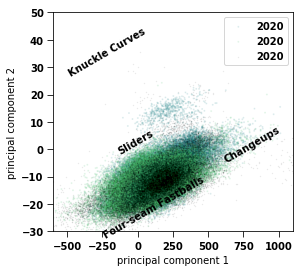

In [29]:




projected = pca.transform(X2019)



#mpl.rcParams['xtick.labelsize'] = 12
#mpl.rcParams['ytick.labelsize'] = 12



fig = plt.figure(figsize=(4.5,4))

ax1 = fig.add_axes([0.13,0.12,0.74,0.76])
#ax4 = fig.add_axes([0.88,0.12,0.015,0.76])

# all 'FF':
#w = np.where(PT2020==13)[0]

# all 'SI': (no FT this year!)
w = np.where(PT2019==8)[0]

# all 'CH':
#w = np.where(PT==0)[0]

ax1.scatter(projected[w, 0], projected[w, 1],
            color=cm.viridis(PT2019[w]/17.,1.), alpha=0.1,s=1.,marker='o',label='2020')


# all 'FT'
w = np.where(PT2019==12)[0]

ax1.scatter(projected[w, 0], projected[w, 1],
            color=cm.viridis(PT2019[w]/17.,1.), alpha=0.1,s=1.,marker='o',label='2020')


projected = pca.transform(X2020)
w = np.where(PT2020==8)[0]

ax1.scatter(projected[w, 0], projected[w, 1],
            color='black', alpha=0.1,s=.5,marker='.',label='2020')




ax1.legend()
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
#ax1.set_title('Gerrit Cole: PCA pitch fingerprints')
#ax1.set_title('Zack Greinke: PCA pitch fingerprints')
#ax1.set_title('Mark Melancon: PCA pitch fingerprints')


ax1.axis([-600,1100,-30,50])

#cmapi = mpl.colors.ListedColormap([cm.viridis(x/14) for x in utype])
#bounds = utype
#norm = mpl.colors.BoundaryNorm(np.array(uvals), cmapi.N)
    
#cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cmapi,norm=norm)
#cb1.set_label('Pitch Type',size=14)
#cb1.set_xlim(1,5)
#cb1.set_ticks([1.5,3,4.5])
#cb1.set_ticklabels(['1','2','4'])
#cb1.ax.minorticks_off()

ax1.text(-250.,-9,'Four-seam Fastballs',ha='left',va='top',rotation=30)
ax1.text(600.,9,'Changeups',ha='left',va='top',rotation=30)
ax1.text(-150.,8,'Sliders',ha='left',va='top',rotation=30)
ax1.text(-500.,45,'Knuckle Curves',ha='left',va='top',rotation=30)




In [30]:
projected = pca.transform(X2019)

for ipt in range(0,17):
    w = np.where(PT2020==ipt)[0]
    print(ipt,iPitchDict[ipt],w.size)

0 CH 18766
1 CU 15482
2 EP 0
3 FO 3
4 FA 0
5 KN 0
6 KC 5086
7 SC 0
8 SI 28318
9 SL 32552
10 FC 11959
11 FS 3945
12 FT 0
13 FF 59082
14 PO 0
15 nan 0
16 CS 130


In [31]:
projected = pca.transform(X2019)




xbins = np.linspace(-1200,1200,90)
dx = xbins[1]-xbins[0]
ybins = np.linspace(-50,50,70)
dy = ybins[1]-ybins[0]

xxbins,yybins = np.meshgrid(xbins,ybins)

img19 = {}



#print(xbin[0:10])

for ipt in [0,1,6,8,9,10,11,13,12]:
    img19[ipt] = np.zeros([xbins.size,ybins.size])


    w = np.where(PT2019==ipt)[0]
    
    xbin = np.round((projected[w, 0] - np.nanmin(xbins))/dx).astype('int')
    ybin = np.round((projected[w, 1] - np.nanmin(ybins))/dy).astype('int')

    for xx in range(0,xbins.size):
        for yy in range(0,ybins.size):
            ww = np.where((xbin == xx) & (ybin == yy))[0]
            img19[ipt][xx,yy] = ww.size



In [32]:

projected = pca.transform(X2020)



xbins = np.linspace(-1200,1200,90)
dx = xbins[1]-xbins[0]
ybins = np.linspace(-50,50,70)
dy = ybins[1]-ybins[0]

xxbins,yybins = np.meshgrid(xbins,ybins)

img20 = {}



#print(xbin[0:10])

for ipt in [0,1,6,8,9,10,11,13]:
    img20[ipt] = np.zeros([xbins.size,ybins.size])


    w = np.where(PT2020==ipt)[0]
    
    xbin = np.round((projected[w, 0] - np.nanmin(xbins))/dx).astype('int')
    ybin = np.round((projected[w, 1] - np.nanmin(ybins))/dy).astype('int')

    for xx in range(0,xbins.size):
        for yy in range(0,ybins.size):
            ww = np.where((xbin == xx) & (ybin == yy))[0]
            img20[ipt][xx,yy] = ww.size




NameError: name 'follow_contour' is not defined

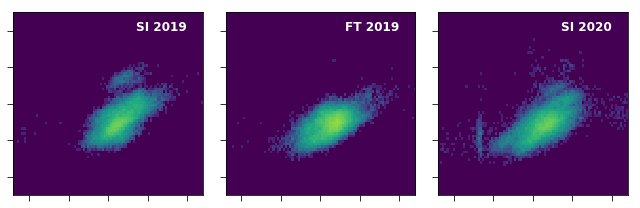

In [33]:

fig = plt.figure(figsize=(9,3))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)



ax = [ax1,ax2,ax3]

for ival,ipt in enumerate([8,12,8]):
    
    if ival < 2:
        ax[ival].imshow(np.log10(img19[ipt].T+1.),origin='lower',\
           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
        ax[ival].text(1000.,40.,iPitchDict[ipt]+' 2019',color='white',size=12,ha='right')
    else:
        ax[ival].imshow(np.log10(img20[ipt].T+1.),origin='lower',\
           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
        ax[ival].text(1000.,40.,iPitchDict[ipt]+' 2020',color='white',size=12,ha='right')
    ax[ival].set_xticklabels(());ax[ival].set_yticklabels(())
    
plt.tight_layout()


XXbins,YYbins = np.meshgrid(xbins,ybins)

#(8,12)

ipt = 8

for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax[0].plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    
for cval in [60,325]:

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax[1].plot(yyell,xxell,color='black',lw=2.)
    
    
for cval in [40,201]:

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax[2].plot(yyell,xxell,color='red',lw=2.)
    





NameError: name 'follow_contour' is not defined

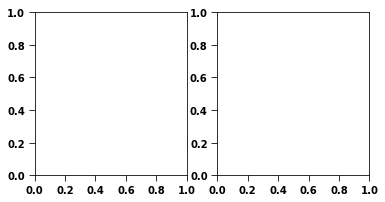

In [34]:
fig = plt.figure(figsize=(6,3))

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ipt = 8

for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    ax2.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')


    

projected = pca.transform(X2020)
ax.scatter(projected[(O2020=='strikeout') & (PT2020==8),0],projected[(O2020=='strikeout') & (PT2020==8),1],color='red',s=0.5,alpha=0.5)

projected = pca.transform(X2020)
ax2.scatter(projected[(O2020=='home_run') & (PT2020==8),0],projected[(O2020=='home_run') & (PT2020==8),1],color='grey',s=5.)


ax.axis([-1000,1000,-30,30])
ax2.axis([-1000,1000,-30,30])

ax.set_title('strikeouts')
ax2.set_title('home runs')


#projected = pca.transform(X2020)
#for plr in ['DakotaHudson']:
#for plr in ['KyleHendricks']:
#for plr in ['JakeArrieta']:
#for plr in ['ZachDavies']:




    #w = np.where( (N2020==plr) & (PT2020==8))[0] # sinkers
    #ax.scatter(projected[w,0],projected[w,1],color='grey',s=1.)
    


[-1200.0, 1200.0, -50.0, 50.0]

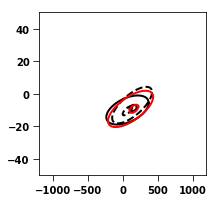

In [176]:

fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)

ipt = 8

for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    

for cval in [60,325]:

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.)
    
    
for cval in [40,201]:

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='red',lw=2.)
    


ax.axis([np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)])


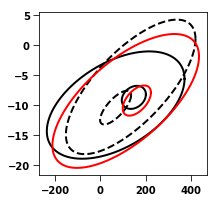

In [177]:

fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)

ipt = 8

for cval in [50,200]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.,linestyle='dashed')
    
for cval in [60,325]:

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=2.)
    
    
for cval in [40,201]:

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='red',lw=2.)
    


#ax.axis([np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)])



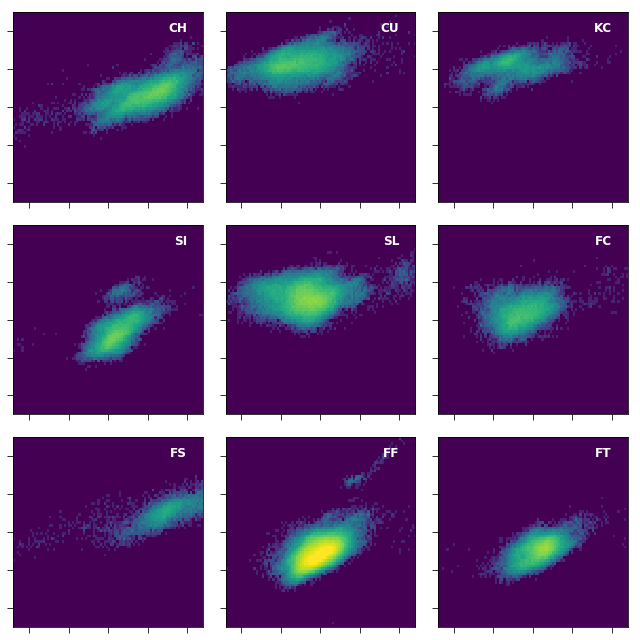

In [127]:

fig = plt.figure(figsize=(9,9))

for ival,ipt in enumerate([0,1,6,8,9,10,11,13,12]):
    ax = fig.add_subplot(3,3,ival+1)
    ax.imshow(np.log10(img19[ipt].T+1.),origin='lower',\
           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
    ax.text(1000.,40.,iPitchDict[ipt],color='white',size=12,ha='right')
    ax.set_xticklabels(());ax.set_yticklabels(())
    
plt.tight_layout()


Text(0, 0.5, 'Fraction Enclosed')

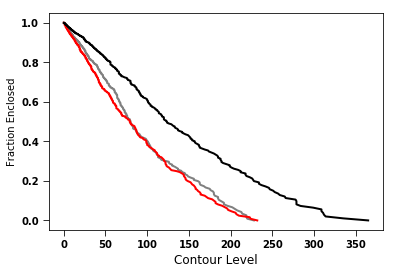

In [36]:
show = img19[ipt].reshape(-1,)
plt.plot(show[show.argsort()],1.-(np.cumsum(show[show.argsort()])/np.nansum(show)),color='grey')

show = img20[ipt].reshape(-1,)
plt.plot(show[show.argsort()],1.-(np.cumsum(show[show.argsort()])/np.nansum(show)),color='red')

show = img19[ipt+4].reshape(-1,)
plt.plot(show[show.argsort()],1.-(np.cumsum(show[show.argsort()])/np.nansum(show)),color='black')




plt.xlabel('Contour Level',size=12)
plt.ylabel('Fraction Enclosed')

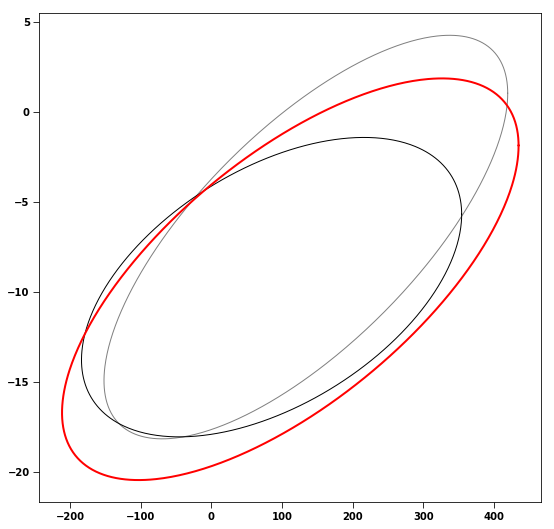

In [53]:
XXbins,YYbins = np.meshgrid(xbins,ybins)

#(8,12)

ipt = 8

fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(111)
#ax.imshow(np.log10(img[ipt].T+1.),origin='lower',\
#           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
#          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
#ax.text(1000.,40.,iPitchDict[ipt],color='white',size=12,ha='right')
#    ax.set_xticklabels(());ax.set_yticklabels(())
    
#plt.tight_layout()


for cval in [50]:

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='grey',lw=1.)
    
for cval in [75]:

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=1.)
    
    
for cval in [40]:

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='red',lw=2.)
    



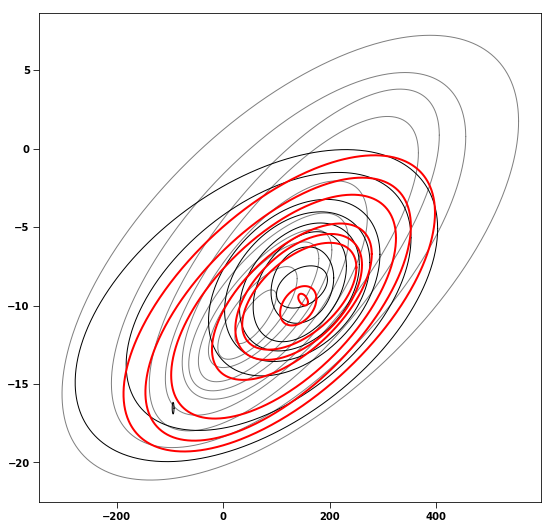

In [52]:
XXbins,YYbins = np.meshgrid(xbins,ybins)

#(8,12)

ipt = 8

fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(111)
#ax.imshow(np.log10(img[ipt].T+1.),origin='lower',\
#           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
#          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
#ax.text(1000.,40.,iPitchDict[ipt],color='white',size=12,ha='right')
#    ax.set_xticklabels(());ax.set_yticklabels(())
    
#plt.tight_layout()


for cval in np.linspace(10.,220.,10):

    #cval = 10.
    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='grey',lw=1.)
    
for cval in np.linspace(40.,380.,10):

    XCON,YCON = follow_contour(XXbins,YYbins,img19[ipt+4],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='black',lw=1.)
    
    
for cval in np.linspace(50.,240.,10):

    XCON,YCON = follow_contour(XXbins,YYbins,img20[ipt],cval)
    a,b,phi,xcenter,ycenter = make_ellipse(XCON,YCON)
    
    yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
    xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))

    ax.plot(yyell,xxell,color='red',lw=2.)
    


-6.953021538494683 133.8328603705274


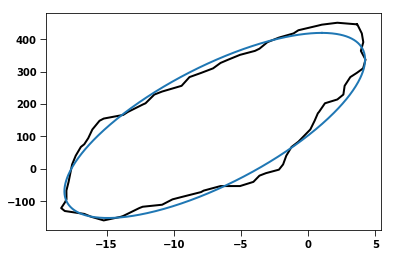

In [51]:
plt.plot(XCON,YCON,color='black')

R = np.arange(0,2*np.pi, 0.01)
xxell = xcenter + a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi)
yyell = ycenter + a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi)

yyell = ycenter + (a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi))
xxell = xcenter - (a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi))


plt.plot(xxell,yyell)
print(xcenter,ycenter)
